In [31]:
import os
import sys
import matplotlib.pyplot as plt
from numpy import *
sys.path.append(os.getcwd())

In [32]:
!ls

EXTRAS                      logRegres.pyc
horseColicTest.txt          logRegres_interactive.ipynb
horseColicTraining.txt      testSet.txt
logRegres.py


In [33]:
def loadDataSet():
    dataMat=[];labelMat=[]
    fr=open('testSet.txt')
    for line in fr.readlines():
        lineArr=line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(lineArr[2])
    return dataMat,labelMat

In [34]:
# 阶跃函数,在实数域内,取值为0-1
def sigmoid(inx):
    return 1.0/(1+exp(-inx))

In [35]:
# 梯度上升
def gradAscent(dataMatIn, classLabels):
    # 转化为矩阵[[1,1,2],[1,1,2]....]
    dataMatrix = mat(dataMatIn)             # 转换为 NumPy 矩阵
    # 转化为矩阵[[0,1,0,1,0,1.....]]，并转制[[0],[1],[0].....]
    # transpose() 行列转置函数
    # 将行向量转化为列向量   =>  矩阵的转置
    # 指定类型为float64
    labelMat = mat(classLabels,dtype='float64').transpose() # 首先将数组转换为 NumPy 矩阵，然后再将行向量转置为列向量
    # m->数据量，样本数 n->特征数
    m,n = shape(dataMatrix)
    # print m, n, '__'*10, shape(dataMatrix.transpose()), '__'*100
    # alpha代表向目标移动的步长
    alpha = 0.001
    # 迭代次数
    maxCycles = 500
    # 生成一个长度和特征数相同的矩阵，此处n为3 -> [[1],[1],[1]]
    # weights 代表回归系数， 此处的 ones((n,1)) 创建一个长度和特征数相同的矩阵，其中的数全部都是 1
    weights = ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        # m*3 的矩阵 * 3*1 的单位矩阵 ＝ m*1的矩阵
        # 那么乘上单位矩阵的意义，就代表：通过公式得到的理论值
        # 参考地址： 矩阵乘法的本质是什么？ https://www.zhihu.com/question/21351965/answer/31050145
        # print 'dataMatrix====', dataMatrix 
        # print 'weights====', weights
        # n*3   *  3*1  = n*1
        h = sigmoid(dataMatrix*weights)     # 矩阵乘法
        # print 'hhhhhhh====', h
        # labelMat是实际值
        error = (labelMat - h)              # 向量相减 
        # 0.001* (3*m)*(m*1) 表示在每一个列上的一个误差情况，最后得出 x1,x2,xn的系数的偏移量
        weights = weights + alpha * dataMatrix.transpose() * error # 矩阵乘法，最后得到回归系数
    return array(weights)

In [36]:
dataArr,labelMat=loadDataSet()

In [37]:
array(dataArr)[1,1]

-1.395634

In [38]:
weights=gradAscent(dataArr,labelMat)

In [39]:
weights

array([[ 4.12414349],
       [ 0.48007329],
       [-0.6168482 ]])

# 分析数据画出决策边界

In [48]:
# 画出数据集和logistic回归最佳拟合直线的函数
def plotBestFit(dataMat, labelMat, weights):
    '''
        Desc:
            将我们得到的数据可视化展示出来
        Args:
            dataMat:样本数据的特征
            labelMat:样本数据的类别标签，即目标变量
            weights:回归系数
        Returns:
            None
    '''
    dataArr=array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    """
    y的由来，卧槽，是不是没看懂？
    首先理论上是这个样子的。
    dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
    w0*x0+w1*x1+w2*x2=f(x)
    x0最开始就设置为1叻， x2就是我们画图的y值，而f(x)被我们磨合误差给算到w0,w1,w2身上去了
    所以： w0+w1*x+w2*y=0 => y = (-w0-w1*x)/w2   
    """
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X'); plt.ylabel('Y')
    plt.show()

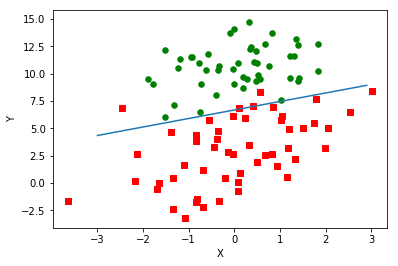

In [49]:
plotBestFit(dataArr,labelMat,weights)